*Case 2*
____

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
!pip install data-science-utils
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import scipy.linalg as lng # linear algebra from scipy library
from sklearn import preprocessing as preproc # load preprocessing function
from pathlib import Path
from PIL import Image
from matplotlib import gridspec
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import os
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Functions

In [ ]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [ ]:
"""

Para todos los colores 


b=np.zeros((40000,1))
for ind,i in enumerate(img.T):
    a=i.flatten().reshape(40000,1)
    print(a.shape)
    b=np.vstack((b,a))
    print(b.shape)
    
b=b[80000:120000]
b.shape
"""



In [ ]:
"""
for idx,el in enumerate(list_img):
    img=plt.imread('data/Faces/'+el+'.jpg')
    
    b=np.zeros((40000,1))
    for ind,i in enumerate(img.T):
        a=i.flatten().reshape(40000,1)
        b=np.vstack((b,a))
    #1 canal
    b=b[40000:80000]
    #2 canal
    #b=b[80000:120000]
    #3 canal
    #b=b[120000:160000]
    
    X[idx]= b.flatten()
    
    
print(X.shape)
"""


In [ ]:
"""
def select_age_range(X,df,AgeMin,AgeMax):
    label_sub=df[(df['Age']>=AgeMin) & (df['Age']<=AgeMax)]
    ind=label_sub.index.tolist()
    Xsub=X[ind]
    return Xsub, label_sub
"""

In [ ]:
"""
# Seleccionar subgrupos por edad
Xsub, label_sub=select_age_range(X,df,10,20)
print(Xsub.shape)
print(label_sub.shape)


# Seleccionar subgrupos por raza
Xsub_white, label_white_sub=select_race(X,df,0)
print(Xsub_white.shape)
print(label_white_sub.shape)
"""

# Import data

* Age: integer from 0-116
* Gender: 0-male, 1-female
* Race: 0 to 4, denoting White, Black, Asian, Indian, and Others (Hispanic, Latino, Middle Eastern)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DTU/Computational Data Analysis/Case_2/labels.csv',names=['Age','Gender','Race'])
df.head()

,Age,Gender,Race
0,100,0,0
1,100,0,0
2,100,1,0
3,100,1,0
4,100,1,0


In [ ]:
data_paths = os.listdir('/content/drive/MyDrive/DTU/Computational Data Analysis/Case_2/Faces0')
n=len(data_paths)
p=200*200
X=np.zeros([n,p])

list_img=[]
# load images
for img in data_paths:
    list_img.append(img[:-4])
    
list_img.sort(key=int)

OSError: ignored

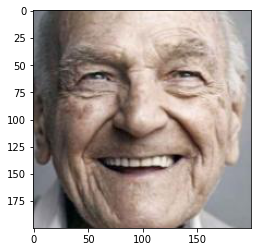

In [ ]:
img=plt.imread('data/Faces/'+'1'+'.jpg')
plt.imshow(img)
None

In [ ]:
list_img.sort(key=int)

for idx,el in enumerate(list_img):
    img=plt.imread('data/Faces'+ '/'+el+'.jpg')
    img2=rgb2gray(img)/255 #a gris 
    flatten=img2.flatten()
    X[idx]=flatten

In [ ]:
print('Number of observations:',X.shape[0])
print('Number of features:',X.shape[1])

Number of observations: 23705
Number of features: 40000


# Exploratory analysis

## Mean and Stdv of faces

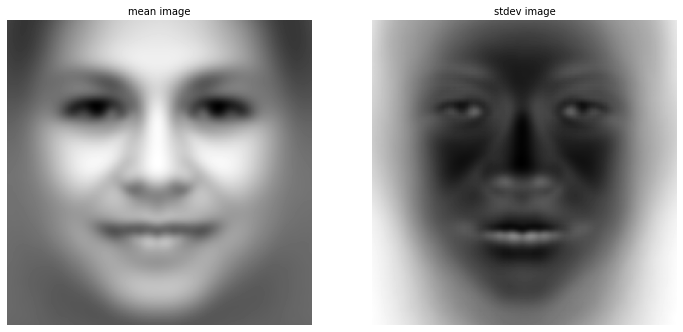

In [ ]:
#show mean face and standard deviation
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

ax[0].imshow(np.mean(X,axis=0).reshape(200,200),cmap='gray');
ax[0].set_axis_off(); ax[0].set_title('mean image',fontsize=10)
        
ax[1].imshow(np.std(X,axis=0).reshape(200,200), cmap='gray');
ax[1].set_axis_off(); ax[1].set_title('stdev image',fontsize=10)

plt.show()

## Select Race and Gender group

In [ ]:
def select_race(X,df,race,gender):
    label_sub=df[(df['Race']==race) & (df['Gender']==gender)]
    label_sub = pd.DataFrame(label_sub)
    #label_sub.reset_index(drop=True, inplace=True)
    ind=label_sub.index.tolist()
    Xsub=X[ind]
    return Xsub, label_sub

In [ ]:
# 10 groups, 5 razas y 2 sexos  
Xsub_white_m,label_sub_white_m=select_race(X,df,0,0) #male
Xsub_white_f,label_sub_white_f=select_race(X,df,0,1) #female

Xsub_black_m,label_sub_black_m=select_race(X,df,1,0)
Xsub_black_f,label_sub_black_f=select_race(X,df,1,1)

Xsub_asian_m,label_sub_asian_m=select_race(X,df,2,0)
Xsub_asian_f,label_sub_asian_f=select_race(X,df,2,1)

Xsub_indian_m,label_sub_indian_m=select_race(X,df,3,0)
Xsub_indian_f,label_sub_indian_f=select_race(X,df,3,1)

Xsub_others_m,label_sub_others_m=select_race(X,df,4,0)
Xsub_others_f,label_sub_others_f=select_race(X,df,4,1)


In [ ]:
print(len(Xsub_white_m),len(Xsub_black_m),len(Xsub_asian_m),len(Xsub_indian_m),len(Xsub_others_m))

print(len(Xsub_white_f),len(Xsub_black_f),len(Xsub_asian_f),len(Xsub_indian_f),len(Xsub_others_f))

5477 2318 1575 2261 760
4601 2208 1859 1714 932


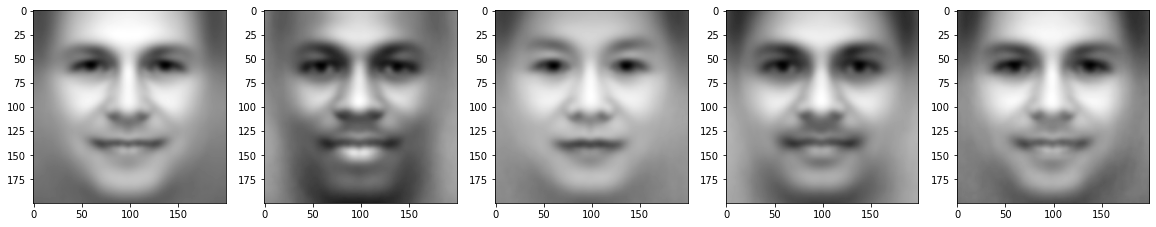

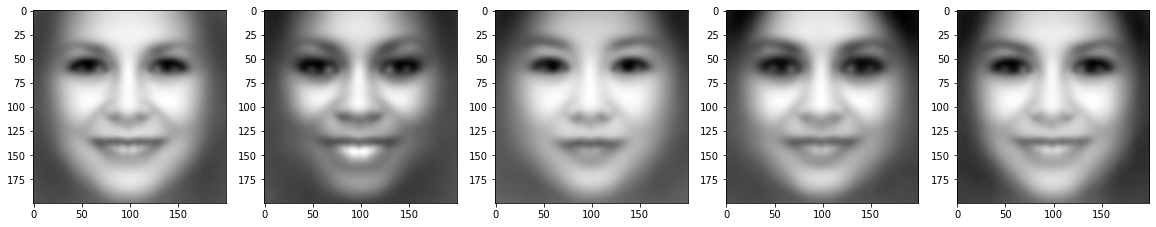

In [ ]:
#MALE
mean_img_white_m=np.mean(Xsub_white_m,axis=0)
mean_img_black_m=np.mean(Xsub_black_m,axis=0)
mean_img_asian_m=np.mean(Xsub_asian_m,axis=0)
mean_img_indian_m=np.mean(Xsub_indian_m,axis=0)
mean_img_others_m=np.mean(Xsub_others_m,axis=0)

fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,20))
ax1.imshow(mean_img_white_m.reshape(200,200),cmap='gray')
ax2.imshow(mean_img_black_m.reshape(200,200),cmap='gray')
ax3.imshow(mean_img_asian_m.reshape(200,200),cmap='gray')
ax4.imshow(mean_img_indian_m.reshape(200,200),cmap='gray')
ax5.imshow(mean_img_others_m.reshape(200,200),cmap='gray')
#plt.set_title(['Male by race'])
#plt.set_aspect('equal', adjustable='box')

#FEMALE
mean_img_white_f=np.mean(Xsub_white_f,axis=0)
mean_img_black_f=np.mean(Xsub_black_f,axis=0)
mean_img_asian_f=np.mean(Xsub_asian_f,axis=0)
mean_img_indian_f=np.mean(Xsub_indian_f,axis=0)
mean_img_others_f=np.mean(Xsub_others_f,axis=0)


fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5,figsize=(20,20))
ax1.imshow(mean_img_white_f.reshape(200,200),cmap='gray')
ax2.imshow(mean_img_black_f.reshape(200,200),cmap='gray')
ax3.imshow(mean_img_asian_f.reshape(200,200),cmap='gray')
ax4.imshow(mean_img_indian_f.reshape(200,200),cmap='gray')
ax5.imshow(mean_img_others_f.reshape(200,200),cmap='gray')
#plt.set_title(['Female by race'])
#plt.set_aspect('equal', adjustable='box')
None

## PCA

> Substract the mean for every group 

In [ ]:
#DATA without Mean image to perform PCA
without_mean_white_m = np.subtract(Xsub_white_m, mean_img_white_m)
without_mean_black_m= np.subtract(Xsub_black_m, mean_img_black_m)
without_mean_asian_m= np.subtract(Xsub_asian_m, mean_img_asian_m)
without_mean_indian_m= np.subtract(Xsub_indian_m, mean_img_indian_m)
without_mean_others_m= np.subtract(Xsub_others_m, mean_img_others_m)

without_mean_white_f = np.subtract(Xsub_white_f, mean_img_white_f)
without_mean_black_f= np.subtract(Xsub_black_f, mean_img_black_f)
without_mean_asian_f= np.subtract(Xsub_asian_f, mean_img_asian_f)
without_mean_indian_f= np.subtract(Xsub_indian_f, mean_img_indian_f)
without_mean_others_f= np.subtract(Xsub_others_f, mean_img_others_f)

In [ ]:
def PCA_fun(N_COMPONENTS,without_mean):

    pca = PCA(N_COMPONENTS) 
    pc_scores = pca.fit_transform(without_mean)
    
    pc_scores_df = pd.DataFrame(data = pc_scores) #4136 features x 300 columns
    print(pc_scores_df.shape)
    
    #Explained variance with that componence
    print(np.sum(pca.explained_variance_ratio_))
    components=pca.components_
    #Reconstructed Image:
    img_recon=np.array(pc_scores_df)@pca.components_

    return pc_scores_df,components,img_recon

> Apply PCA, print explained variance and return the reconstructed images

In [ ]:
veps_white_m,comp_white_m,img_reco_white_m=PCA_fun(200,without_mean_white_m)
veps_black_m,comp_black_m,img_reco_black_m=PCA_fun(200,without_mean_black_m)
veps_asian_m,comp_asian_m,img_reco_asian_m=PCA_fun(200,without_mean_asian_m)
veps_indian_m,comp_indian_m,img_reco_indian_m=PCA_fun(200,without_mean_indian_m)
veps_others_m,comp_others_m,img_reco_others_m=PCA_fun(200,without_mean_others_m)


veps_white_f,comp_white_f,img_reco_white_f=PCA_fun(200,without_mean_white_f)
veps_black_f,comp_black_f,img_reco_black_f=PCA_fun(200,without_mean_black_f)
veps_asian_f,comp_asian_f,img_reco_asian_f=PCA_fun(200,without_mean_asian_f)
veps_indian_f,comp_indian_f,img_reco_indian_f=PCA_fun(200,without_mean_indian_f)
veps_others_f,comp_others_f,img_reco_others_f=PCA_fun(200,without_mean_others_f)

(5477, 200)
0.9486676110571087
(2318, 200)
0.9502425035329919
(1575, 200)
0.9641935441559852
(2261, 200)
0.9579581801027539
(760, 200)
0.9672439295870348
(4601, 200)
0.9521230210029225
(2208, 200)
0.9557687291586696
(1859, 200)
0.9681303513138725
(1714, 200)
0.9632709339867332
(932, 200)
0.9685851010418856


# K-means

## Select optimal K

### Elbow Method

In [ ]:
def analyze_cluster(kmeans, Xsub):
    #put image indexes in a dictionary from the clustering
    mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

    return mydict

In [ ]:
def reset_index_age(label_sub,clusters_img):
    reset_index_label=label_sub.reset_index()
    group=[]
    for a in clusters_img.values():
        i=[reset_index_label.iloc[i].Age for i in a]

        group.append(i)
    
    return group

In [ ]:
def KMeans_algorithm(input_f, Xsub,label_sub,plot):
    input_f_a=np.array(input_f)
    dict_mean_k={}
    kelbow=[]
    for i in range(2,7):
        #Declare and fit model
        kmeans = KMeans(n_clusters=i, random_state=42).fit(input_f)
        
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        #Predictions on the subset of data
        all_predictions = kmeans.predict(input_f)
        curr_sse = 0
                                         
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for j in range(len(input_f_a)):
            curr_center = centroids[all_predictions[j]]
            curr_sse += (input_f_a[j, 0] - curr_center[0]) ** 2 + (input_f_a[j, 1] - curr_center[1]) ** 2
        
        kelbow.append(curr_sse)

        if plot==True:
            plt.figure(figsize=(6,4))
            sns.scatterplot(input_f[0],input_f[1],hue=all_predictions,palette="viridis")
            plt.title('Clusters when k_means=%d'%i)
            plt.show()
    
        
        mydict=analyze_cluster(kmeans, Xsub)
        g=reset_index_age(label_sub,mydict)
        
        mean_g=[]
        for m in g:
            mean_g.append(np.mean(m))
        
        dict_mean_k[i] = mean_g
    
    #Plot elbow method:
    plt.figure(figsize=(6,4))
    plt.plot(list(np.arange(2,7)),kelbow)
    plt.xlabel("K")
    plt.ylabel("WSS")
    plt.show()

    return dict_mean_k,kelbow


In [ ]:
#Dict to save the mean age of each k-cluster: FOR MEN
print('Race:White Men')
Kmeans_white_m,k1=KMeans_algorithm(veps_white_m,Xsub_white_m,label_sub_white_m,True)

print('Race:Black Men')
Kmeans_black_m,k2=KMeans_algorithm(veps_black_m,Xsub_black_m,label_sub_black_m,True)

print('Race:Asian Men')
Kmeans_asian_m,k3=KMeans_algorithm(veps_asian_m,Xsub_asian_m,label_sub_asian_m,True)

print('Race:Indian Men')
Kmeans_indian_m,k4=KMeans_algorithm(veps_indian_m,Xsub_indian_m,label_sub_indian_m,True)

print('Race:Others Men')
Kmeans_others_m,k5=KMeans_algorithm(veps_others_m,Xsub_others_m,label_sub_others_m,True)


Race:White Men


NameError: ignored

In [ ]:
#Dict to save the mean age of each k-cluster: FOR WOMEN
print('Race:White Women')
Kmeans_white_f,k11=KMeans_algorithm(veps_white_f,Xsub_white_f,label_sub_white_f,True)

print('Race:Black Women')
Kmeans_black_f,k22=KMeans_algorithm(veps_black_f,Xsub_black_f,label_sub_black_f,True)

print('Race:Asian Women')
Kmeans_asian_f,k33=KMeans_algorithm(veps_asian_f,Xsub_asian_f,label_sub_asian_f,True)

print('Race:Indian Women')
Kmeans_indian_f,k44=KMeans_algorithm(veps_indian_f,Xsub_indian_f,label_sub_indian_f,True)

print('Race:Others Women')
Kmeans_others_f,k55=KMeans_algorithm(veps_others_f,Xsub_others_f,label_sub_others_f,True)

### Gap Statistic
Using gap-statistics to select K for K-means clustering.

(not working yet)

In [ ]:
def KMeans_gap(input_f, Xsub,label_sub):
    X=np.array(input_f)
    [N,p]=X.shape
    minX= list(np.min(X, axis=0)) # data range min
    maxX=list(np.max(X, axis=0)) # data range max
    
    clustersNr=8
    list_clusters=range(1,clustersNr+1)
    Nsim=20
    Wu=np.zeros((clustersNr,Nsim))
    W=np.zeros(clustersNr)
    
    for nrClusters in list_clusters:
        #Declare and fit model
        kmeans = KMeans(n_clusters=nrClusters, random_state=42).fit(X)
        C = kmeans.cluster_centers_
        labelsCl = kmeans.labels_
        
        for cluster in range(1,clustersNr+1):
            Ik=np.where(labelsCl==cluster -1)[0]
            dk=np.sum((X[Ik, :] - np.multiply(np.ones((np.size(Ik), 1)),C[cluster - 1, :]))**2,axis = 1) 
            Dk = np.sum(dk)
            W[clustersNr-1] += Dk
        
        #gap statistic
        for j in range(Nsim):
            #uniformly distributed data
            Xu=np.ones((N,1))*minX + np.random.rand(N,p)*(np.ones((N,1))*maxX-np.ones((N,1))*minX)
            #perform kmeans
            kmeansU = KMeans(n_clusters=nrClusters).fit(Xu)
            Cu = kmeansU.cluster_centers_
            labelClusterU = kmeansU.labels_
            
            for cluster in range(1,clustersNr+1):
                Iku=np.where(labelClusterU==cluster -1)[0]
                dku=np.sum((Xu[Iku, :] - np.multiply(np.ones((np.size(Iku), 1)),Cu[cluster - 1, :]))**2, axis = 1) 
                Dku = np.sum(dku)
                Wu[clustersNr - 1, j] += Dku
                
                
    Elog_Wu = np.mean(np.log(Wu), axis = 1)
    sk = np.std(np.log(Wu), axis=1)*np.sqrt(1+1/Nsim) # standard error sk' in (14→39)
    x_range = np.array(range(clustersNr )) + 1
    
    return x_range,W,Elog_Wu


## Perform final clustering

### Male

In [ ]:
###### Hombres - Blancos 

#Number of clusters
K = 4
# initialize model
kMeans = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans.fit(veps_white_m)


###### Hombres - Negros

#Number of clusters
K = 4
# initialize model
kMeans_b = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_b.fit(veps_black_m)


###### Hombres - Asian

#Number of clusters
K = 4
# initialize model
kMeans_asian = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_asian.fit(veps_asian_m)


###### Hombres - Indian

#Number of clusters
K = 4
# initialize model
kMeans_indian = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_indian.fit(veps_indian_m)


###### Hombres - Others

#Number of clusters
K = 4
# initialize model
kMeans_others = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_others.fit(veps_others_m)



KMeans(n_clusters=4, random_state=42)

### Women

In [ ]:
###### Female - Blancos 

#Number of clusters
K = 4
# initialize model
kMeans_w_f = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_w_f.fit(veps_white_f)


###### Female - Negros

#Number of clusters
K = 4
# initialize model
kMeans_b_f = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_b_f.fit(veps_black_f)


###### Female - Asian

#Number of clusters
K = 4
# initialize model
kMeans_asian_f = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_asian_f.fit(veps_asian_f)


###### Female - Indian

#Number of clusters
K = 4
# initialize model
kMeans_indian_f = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_indian_f.fit(veps_indian_f)


###### Female - Others

#Number of clusters
K = 4
# initialize model
kMeans_others_f = KMeans(n_clusters=K,random_state=42)
# Fit the model
kMeans_others_f.fit(veps_others_f)



KMeans(n_clusters=4, random_state=42)

## Plot the mean image of the clusters

In [ ]:
# Function to retrieve the original images of the subgroup according to the assigned cluster and plot the mean image

def plot_mean_cluster_image(kMeans, original_labels, original_img):
    
    # Labels of the clusters 
    # kmeans.labels_ ONLY denotes the CLUSTER to which the image belongs to
    assigned_cluster_label = pd.DataFrame()
    assigned_cluster_label['cluster_label'] = kMeans.labels_
    
    # reset el index de las labels originales
    #original_labels = original_labels.reset_index(drop=True, inplace=True)
    
    # merge dataframe of orginal_labels with the assigned cluster tag
    result = pd.merge(original_labels, assigned_cluster_label, left_index=True, right_index=True)
    
   
    # query by cluster 
    dict_of_df = {}
    for c in (sorted(assigned_cluster_label['cluster_label'].unique())):
        cluster_i = result[result['cluster_label'] == c]
        dict_of_df[c] = cluster_i
        
      
    # select 
    dict_of_cluster_index= {} 
    for key in dict_of_df.keys():
        indexes_cluster = np.array(dict_of_df[key].index)
        dict_of_cluster_index[key] = indexes_cluster

    
    
    df_original_images = pd.DataFrame(original_img)

    dict_of_cluster_images = {}
    for key2 in dict_of_cluster_index.keys():
        # select the original images defined by the cluster in this group (white men)
         dict_of_cluster_images[key2] = df_original_images[df_original_images.index.isin(dict_of_cluster_index[key2])]
        
    
    mean_image_per_cluster = {}
    for key3 in dict_of_cluster_images.keys():
        mean_image_per_cluster[key3]=np.mean(dict_of_cluster_images[key3],axis=0)
    
    
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(20,20))

    ax1.imshow(np.array(mean_image_per_cluster[0]).reshape(200,200),cmap='gray')
    ax1.set_title("mean cluster 0")
    ax2.imshow(np.array(mean_image_per_cluster[1]).reshape(200,200),cmap='gray')
    ax2.set_title("mean cluster 1")
    ax3.imshow(np.array(mean_image_per_cluster[2]).reshape(200,200),cmap='gray')
    ax3.set_title("mean cluster 2")
    ax4.imshow(np.array(mean_image_per_cluster[3]).reshape(200,200),cmap='gray')
    ax4.set_title("mean cluster 3")
    #ax5.imshow(np.array(mean_image_per_cluster[4]).reshape(200,200),cmap='gray')
    #ax5.set_title("mean cluster 4")

    None
    
    for i in range(4):
        avg_age = dict_of_df[i]['Age'].mean()
        age_max= dict_of_df[i]['Age'].max()
        age_min = dict_of_df[i]['Age'].min()

        print('Cluster %d' %i)
        print('Avg age of cluser:',avg_age)
        print('Max age of cluster:',age_max)  
        print('Min age of cluster:',age_min)
        print('\n')

    
    return dict_of_df, dict_of_cluster_images, mean_image_per_cluster
       
    

    

### Results Men

Cluster 0
Avg age of cluser: 40.79895104895105
Max age of cluster: 105
Min age of cluster: 1


Cluster 1
Avg age of cluser: 40.93939393939394
Max age of cluster: 110
Min age of cluster: 1


Cluster 2
Avg age of cluser: 41.85399091499026
Max age of cluster: 100
Min age of cluster: 1


Cluster 3
Avg age of cluser: 32.12006446414182
Max age of cluster: 90
Min age of cluster: 1




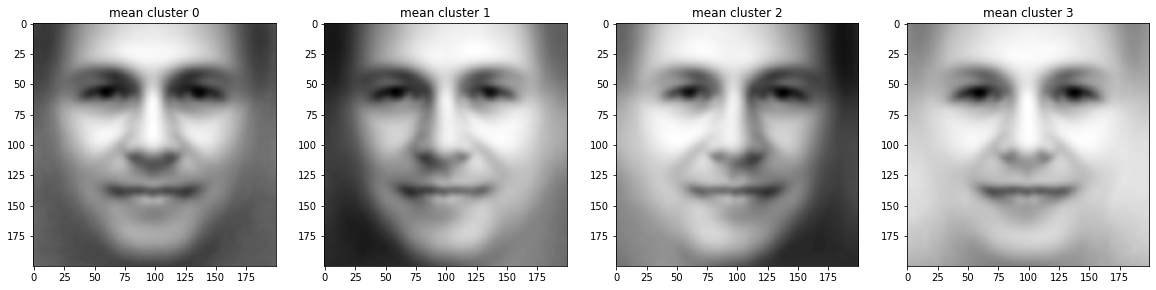

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df, dict_of_cluster_images, mean_image_per_cluster = plot_mean_cluster_image(kMeans,
                                                                                     label_sub_white_m,
                                                                                     Xsub_white_m)

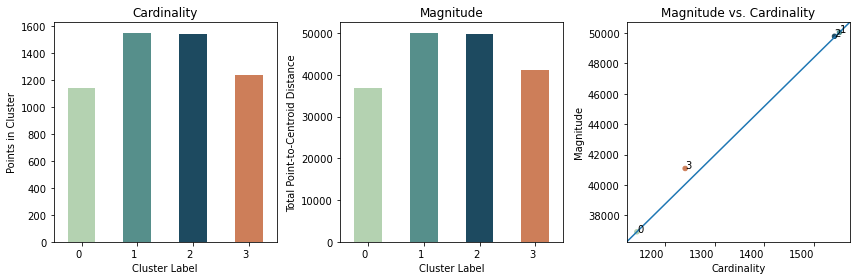

In [ ]:
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(kMeans.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(veps_white_m,
                       kMeans.labels_,
                       kMeans.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(veps_white_m,
                              kMeans.labels_,
                              kMeans.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:kMeans.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

Cluster 0
Avg age of cluser: 15.357142857142858
Max age of cluster: 19
Min age of cluster: 10


Cluster 1
Avg age of cluser: 13.34
Max age of cluster: 19
Min age of cluster: 1


Cluster 2
Avg age of cluser: 13.75
Max age of cluster: 19
Min age of cluster: 1


Cluster 3
Avg age of cluser: 13.375
Max age of cluster: 19
Min age of cluster: 1




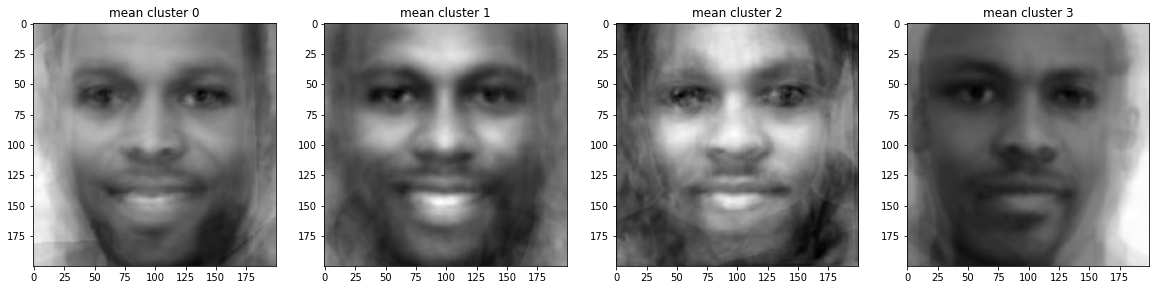

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df_black, dict_of_cluster_images_black, mean_image_per_cluster_black = plot_mean_cluster_image(kMeans_b,
                                                                                                       label_sub_black_m,
                                                                                                       Xsub_black_m)

Cluster 0
Avg age of cluser: 15.875
Max age of cluster: 19
Min age of cluster: 11


Cluster 1
Avg age of cluser: 23.1
Max age of cluster: 110
Min age of cluster: 10


Cluster 2
Avg age of cluser: 24.1
Max age of cluster: 103
Min age of cluster: 12


Cluster 3
Avg age of cluser: 15.545454545454545
Max age of cluster: 19
Min age of cluster: 12




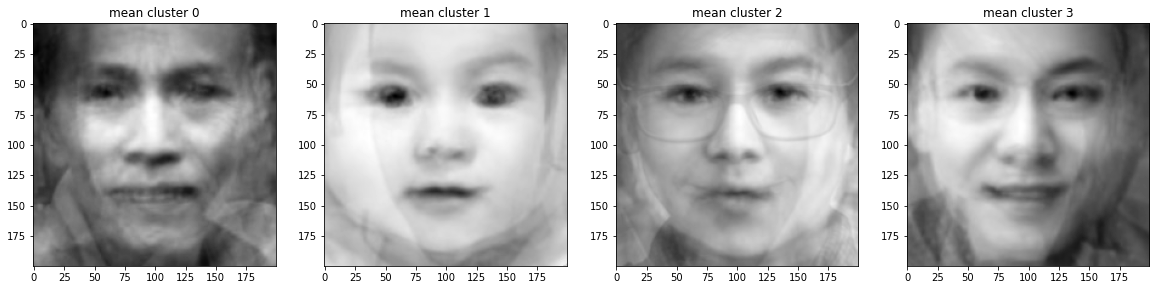

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df_asian, dict_of_cluster_images_asian, mean_image_per_cluster_asian = plot_mean_cluster_image(kMeans_asian,
                                                                                                       label_sub_asian_m,
                                                                                                       Xsub_asian_m)

Cluster 0
Avg age of cluser: 4.88135593220339
Max age of cluster: 19
Min age of cluster: 1


Cluster 1
Avg age of cluser: 5.040816326530612
Max age of cluster: 19
Min age of cluster: 1


Cluster 2
Avg age of cluser: 4.454545454545454
Max age of cluster: 18
Min age of cluster: 1


Cluster 3
Avg age of cluser: 8.75
Max age of cluster: 18
Min age of cluster: 1




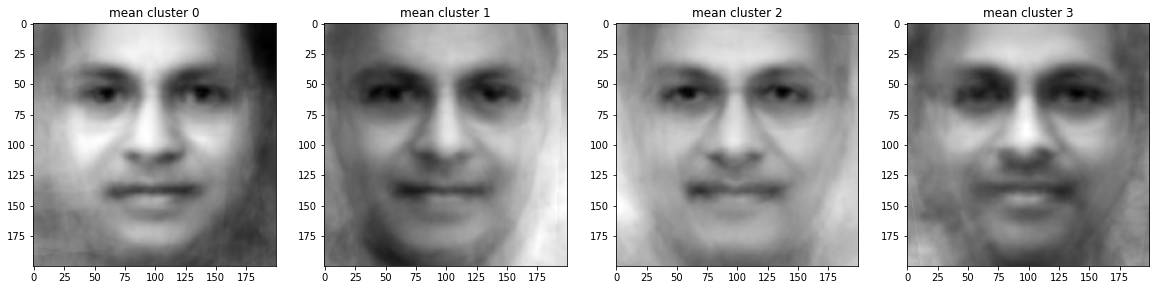

In [ ]:
dict_of_df_indian, dict_of_cluster_images_indian, mean_image_per_cluster_indian = plot_mean_cluster_image(kMeans_indian,
                                                                                                       label_sub_indian_m,
                                                                                                       Xsub_indian_m)

Cluster 0
Avg age of cluser: 12.222222222222221
Max age of cluster: 15
Min age of cluster: 10


Cluster 1
Avg age of cluser: 13.11111111111111
Max age of cluster: 15
Min age of cluster: 10


Cluster 2
Avg age of cluser: 12.75
Max age of cluster: 15
Min age of cluster: 10


Cluster 3
Avg age of cluser: 10.5
Max age of cluster: 12
Min age of cluster: 10




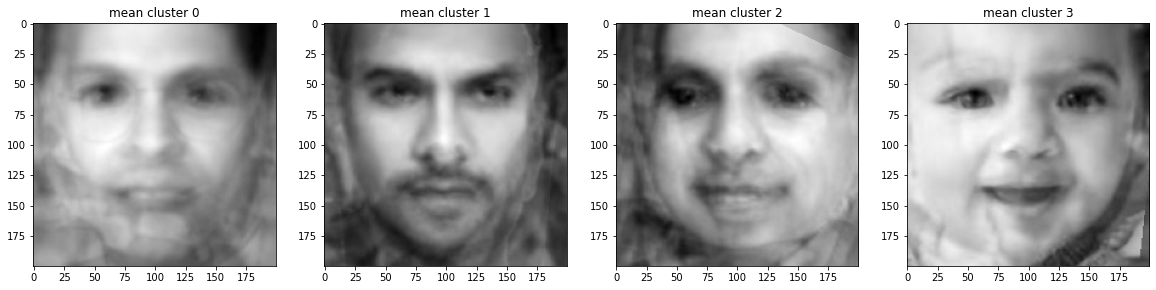

In [ ]:
dict_of_df_others, dict_of_cluster_images_others, mean_image_per_cluster_others = plot_mean_cluster_image(kMeans_others,
                                                                                                       label_sub_others_m,
                                                                                                       Xsub_others_m)

### Results Women

Cluster 0
Avg age of cluser: 15.562264150943395
Max age of cluster: 105
Min age of cluster: 1


Cluster 1
Avg age of cluser: 18.027950310559007
Max age of cluster: 116
Min age of cluster: 1


Cluster 2
Avg age of cluser: 15.679611650485437
Max age of cluster: 111
Min age of cluster: 1


Cluster 3
Avg age of cluser: 18.635983263598327
Max age of cluster: 116
Min age of cluster: 1




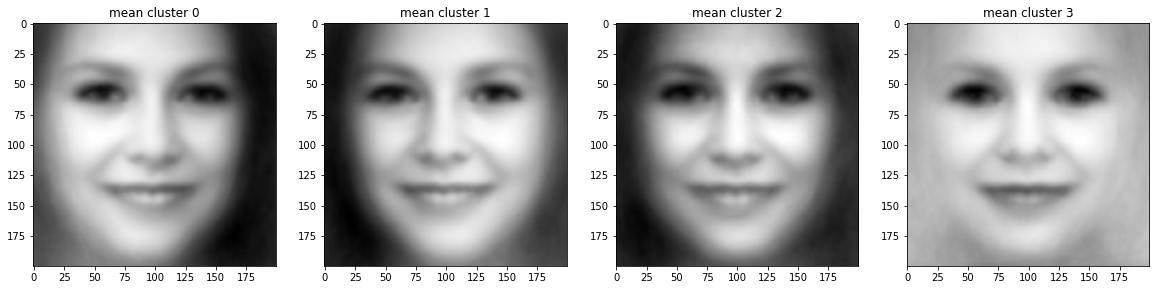

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df_w_f, dict_of_cluster_images_w_f, mean_image_per_cluster_w_f = plot_mean_cluster_image(kMeans_w_f,
                                                                                     label_sub_white_f,
                                                                                     Xsub_white_f)

Cluster 0
Avg age of cluser: 37.53846153846154
Max age of cluster: 115
Min age of cluster: 10


Cluster 1
Avg age of cluser: 15.55
Max age of cluster: 19
Min age of cluster: 10


Cluster 2
Avg age of cluser: 15.928571428571429
Max age of cluster: 19
Min age of cluster: 10


Cluster 3
Avg age of cluser: 15.666666666666666
Max age of cluster: 19
Min age of cluster: 10




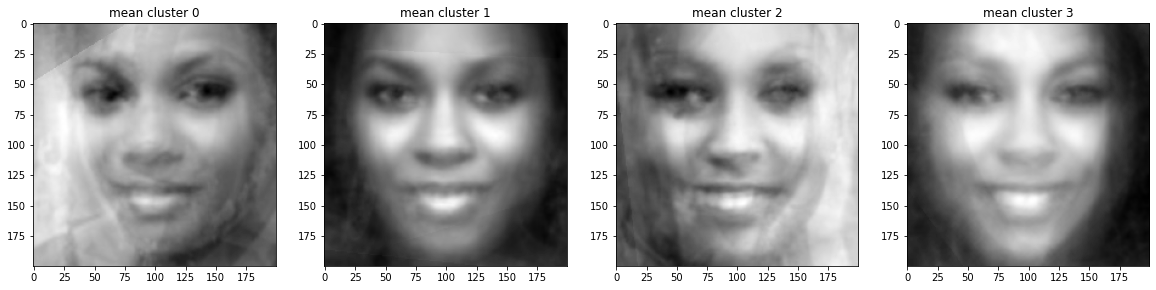

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df_b_f, dict_of_cluster_images_b_f, mean_image_per_cluster_b_f = plot_mean_cluster_image(kMeans_b_f,
                                                                                     label_sub_black_f,
                                                                                     Xsub_black_f)

Cluster 0
Avg age of cluser: 19.941176470588236
Max age of cluster: 116
Min age of cluster: 10


Cluster 1
Avg age of cluser: 21.2
Max age of cluster: 100
Min age of cluster: 12


Cluster 2
Avg age of cluser: 23.63157894736842
Max age of cluster: 101
Min age of cluster: 10


Cluster 3
Avg age of cluser: 22.846153846153847
Max age of cluster: 100
Min age of cluster: 12




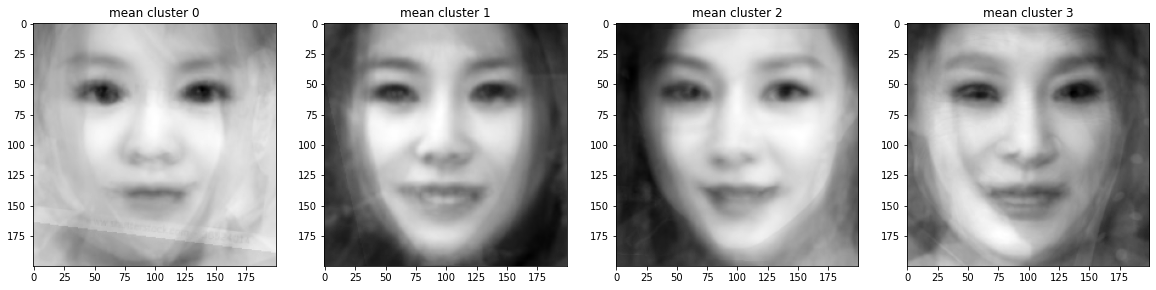

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df_a_f, dict_of_cluster_images_a_f, mean_image_per_cluster_a_f = plot_mean_cluster_image(kMeans_asian_f,
                                                                                     label_sub_asian_f,
                                                                                     Xsub_asian_f)

Cluster 0
Avg age of cluser: 21.303030303030305
Max age of cluster: 116
Min age of cluster: 10


Cluster 1
Avg age of cluser: 14.722222222222221
Max age of cluster: 19
Min age of cluster: 11


Cluster 2
Avg age of cluser: 15.772727272727273
Max age of cluster: 19
Min age of cluster: 12


Cluster 3
Avg age of cluser: 15.277777777777779
Max age of cluster: 19
Min age of cluster: 11




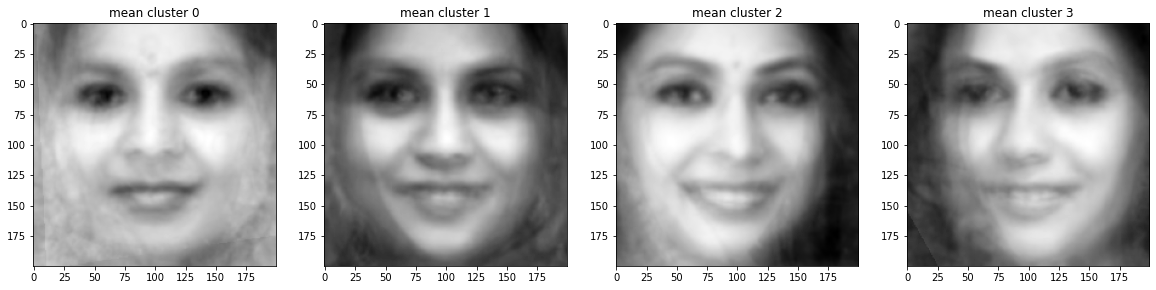

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df_i_f, dict_of_cluster_images_i_f, mean_image_per_cluster_i_f = plot_mean_cluster_image(kMeans_indian_f,
                                                                                     label_sub_indian_f,
                                                                                     Xsub_indian_f)

Cluster 0
Avg age of cluser: 13.5625
Max age of cluster: 15
Min age of cluster: 10


Cluster 1
Avg age of cluser: 13.222222222222221
Max age of cluster: 15
Min age of cluster: 10


Cluster 2
Avg age of cluser: 13.5
Max age of cluster: 15
Min age of cluster: 11


Cluster 3
Avg age of cluser: 12.5
Max age of cluster: 15
Min age of cluster: 10




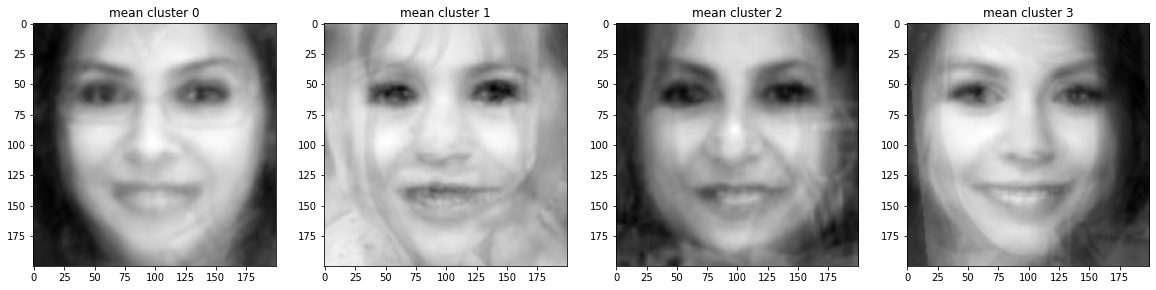

In [ ]:
# Plot the mean of the original images assigned to each cluster 
dict_of_df_o_f, dict_of_cluster_images_o_f, mean_image_per_cluster_o_f = plot_mean_cluster_image(kMeans_others_f,
                                                                                     label_sub_others_f,
                                                                                     Xsub_others_f)

### Thinking process

In [ ]:
cluster_0 = result[result['cluster_label'] == 0]
cluster_0

,Age,Gender,Race,cluster_label
6,10,0,0,0
11,10,0,0,0
20,10,0,0,0
24,10,0,0,0
29,10,0,0,0
...,...,...,...,...
5433,9,0,0,0
5448,9,0,0,0
5449,9,0,0,0
5467,9,0,0,0


In [ ]:
labels_white_m

,Age,Gender,Race
0,100,0,0
1,100,0,0
2,101,0,0
3,105,0,0
4,10,0,0
...,...,...,...
5472,9,0,0
5473,9,0,0
5474,9,0,0
5475,9,0,0


In [ ]:
assigned_cluster_label

,cluster_label
0,6
1,1
2,6
3,6
4,1
...,...
5472,7
5473,0
5474,8
5475,9


In [ ]:
# merge data frame of orginal labels of group with the assigned cluster 
result = pd.merge(labels_white_m, assigned_cluster_label, left_index=True, right_index=True)
cluster0 = result.query('cluster_label == 0')
cluster0

,Age,Gender,Race,cluster_label
6,10,0,0,0
11,10,0,0,0
20,10,0,0,0
24,10,0,0,0
29,10,0,0,0
...,...,...,...,...
5433,9,0,0,0
5448,9,0,0,0
5449,9,0,0,0
5467,9,0,0,0


In [ ]:
# real indexes of the cluster
index_cl0 = np.array(cluster0.index)

In [ ]:
df_w_m = pd.DataFrame(Xsub_white_m)

In [ ]:
dict_of_cluster_images = {}
for key2 in dict_of_cluster_index.keys():
        # select the original images defined by the cluster in this group (white men)
    dict_of_cluster_images[key2] = df_w_m[df_w_m.index.isin(dict_of_cluster_index[key2])]
        
    

In [ ]:
dict_of_cluster_images[0]

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
6,0.251628,0.235943,0.232022,0.255549,0.290840,0.306524,0.298724,0.279118,0.306567,0.317200,...,0.005051,0.006906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.348847,0.372375,0.313557,0.266503,0.286109,0.266503,0.270424,0.356690,0.329242,0.293951,...,0.005861,0.024446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,0.293909,0.344884,0.262539,0.277777,0.315412,0.299727,0.354624,0.334124,0.317309,0.419260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24,0.297660,0.312215,0.345929,0.376169,0.393068,0.383649,0.358545,0.333888,0.324916,0.289625,...,0.016748,0.003576,0.000000,0.000000,0.011764,0.015685,0.007842,0.000000,0.000000,0.000000
29,0.277625,0.302047,0.353022,0.349101,0.275493,0.246915,0.274363,0.278284,0.242099,0.282761,...,0.689839,0.694654,0.714140,0.703271,0.689163,0.683344,0.675671,0.667508,0.650373,0.641806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,0.359453,0.357682,0.345127,0.326114,0.302732,0.283229,0.277471,0.278618,0.222761,0.271839,...,0.281512,0.272944,0.255549,0.255549,0.251628,0.247749,0.247749,0.243828,0.239907,0.238777
5448,0.548011,0.520563,0.502365,0.497314,0.481629,0.448236,0.416867,0.407000,0.451541,0.514322,...,0.533231,0.533231,0.529630,0.529630,0.529630,0.529630,0.529630,0.529630,0.529630,0.529630
5449,0.156847,0.211744,0.223507,0.164689,0.109793,0.113714,0.149005,0.172532,0.172532,0.199980,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5467,0.054896,0.050975,0.052105,0.046776,0.046776,0.051549,0.051549,0.055513,0.059434,0.059712,...,0.479160,0.479160,0.470315,0.470315,0.470315,0.470315,0.470315,0.470315,0.470315,0.470315


In [ ]:
# select the original images defined by the cluster in this group (white men)
cluster0_img = df_w_m[df_w_m.index.isin(index_cl0)]


In [ ]:
cluster0_img

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
6,0.251628,0.235943,0.232022,0.255549,0.290840,0.306524,0.298724,0.279118,0.306567,0.317200,...,0.005051,0.006906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.348847,0.372375,0.313557,0.266503,0.286109,0.266503,0.270424,0.356690,0.329242,0.293951,...,0.005861,0.024446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,0.293909,0.344884,0.262539,0.277777,0.315412,0.299727,0.354624,0.334124,0.317309,0.419260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24,0.297660,0.312215,0.345929,0.376169,0.393068,0.383649,0.358545,0.333888,0.324916,0.289625,...,0.016748,0.003576,0.000000,0.000000,0.011764,0.015685,0.007842,0.000000,0.000000,0.000000
29,0.277625,0.302047,0.353022,0.349101,0.275493,0.246915,0.274363,0.278284,0.242099,0.282761,...,0.689839,0.694654,0.714140,0.703271,0.689163,0.683344,0.675671,0.667508,0.650373,0.641806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,0.359453,0.357682,0.345127,0.326114,0.302732,0.283229,0.277471,0.278618,0.222761,0.271839,...,0.281512,0.272944,0.255549,0.255549,0.251628,0.247749,0.247749,0.243828,0.239907,0.238777
5448,0.548011,0.520563,0.502365,0.497314,0.481629,0.448236,0.416867,0.407000,0.451541,0.514322,...,0.533231,0.533231,0.529630,0.529630,0.529630,0.529630,0.529630,0.529630,0.529630,0.529630
5449,0.156847,0.211744,0.223507,0.164689,0.109793,0.113714,0.149005,0.172532,0.172532,0.199980,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5467,0.054896,0.050975,0.052105,0.046776,0.046776,0.051549,0.051549,0.055513,0.059434,0.059712,...,0.479160,0.479160,0.470315,0.470315,0.470315,0.470315,0.470315,0.470315,0.470315,0.470315


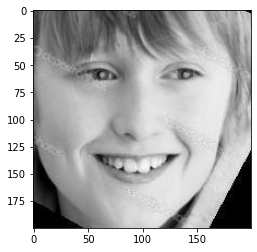

In [ ]:
# plot one of the cluster images 
plt.imshow(np.array(cluster0_img.iloc[2]).reshape(200,200),cmap='gray')


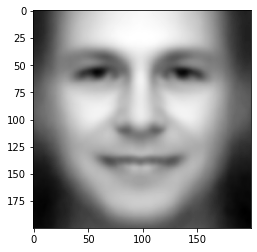

In [ ]:
mean_img_cluster_0=np.mean(cluster0_img,axis=0)
plt.imshow(np.array(mean_img_cluster_0).reshape(200,200),cmap='gray')

In [ ]:
mean_image_per_cluster = {}
for key3 in dict_of_cluster_images.keys():
    mean_image_per_cluster[key3]=np.mean(dict_of_cluster_images[key3],axis=0)
    


In [ ]:
mean_image_per_cluster[0].shape

(40000,)

# Archetype analysis and ICA